In [1]:
# External dependencies
import numpy as np
from sklearn.naive_bayes import GaussianNB                         
from sklearn.model_selection import StratifiedKFold 
from sklearn.datasets import load_wine

# PyWin dependencies
from pywinEA.algorithm import GA
from pywinEA.visualization import Plotter, GAevaluator

In [2]:
dataset = load_wine()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# Add noisy variables
for n in range(40):
    dataset['feature_names'] = np.append(dataset['feature_names'], 'noisy_var_%d' % n)
    dataset['data'] = np.hstack(
        [dataset['data'], np.random.uniform(0, 10, size=dataset['data'].shape[0]).reshape(-1, 1)])
    
print('Num of features %d\nx_data shape %r' % (len(dataset['feature_names']), dataset['data'].shape))

Num of features 53
x_data shape (178, 53)


In [9]:
ga_basic = GA(
    population_size=50, generations=100, fitness=GaussianNB(), cv=5,
    elitism=0.2, mutation_rate=0.1, positive_class=1, id="BasicGA"
)

In [14]:
ga_basic.set_features(dataset['feature_names'])

In [15]:
ga_basic.fit(dataset['data'], dataset['target'])

 (BasicGA) Generations (form 0 to 100): 100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


GA(population_size=50 generations=100 elitism=<class 'pywinEA.operators.population.BestFitness'> elitism_rate=0.2 annihilation=None)annihilation_rate=None fill_with_elite=0 mutation=<class 'pywinEA.operators.individual.RandomMutation'> mutation_rate=0.1 selection=TournamentSelection(k=2 replacement=False winners=1) fitness=MonoObjectiveCV(estimator=GaussianNB(priors=None, var_smoothing=1e-09) cv=5 n_jobs=1 score=accuracy crossover=OnePoint imputer=None positive_class=1 random_rate=None

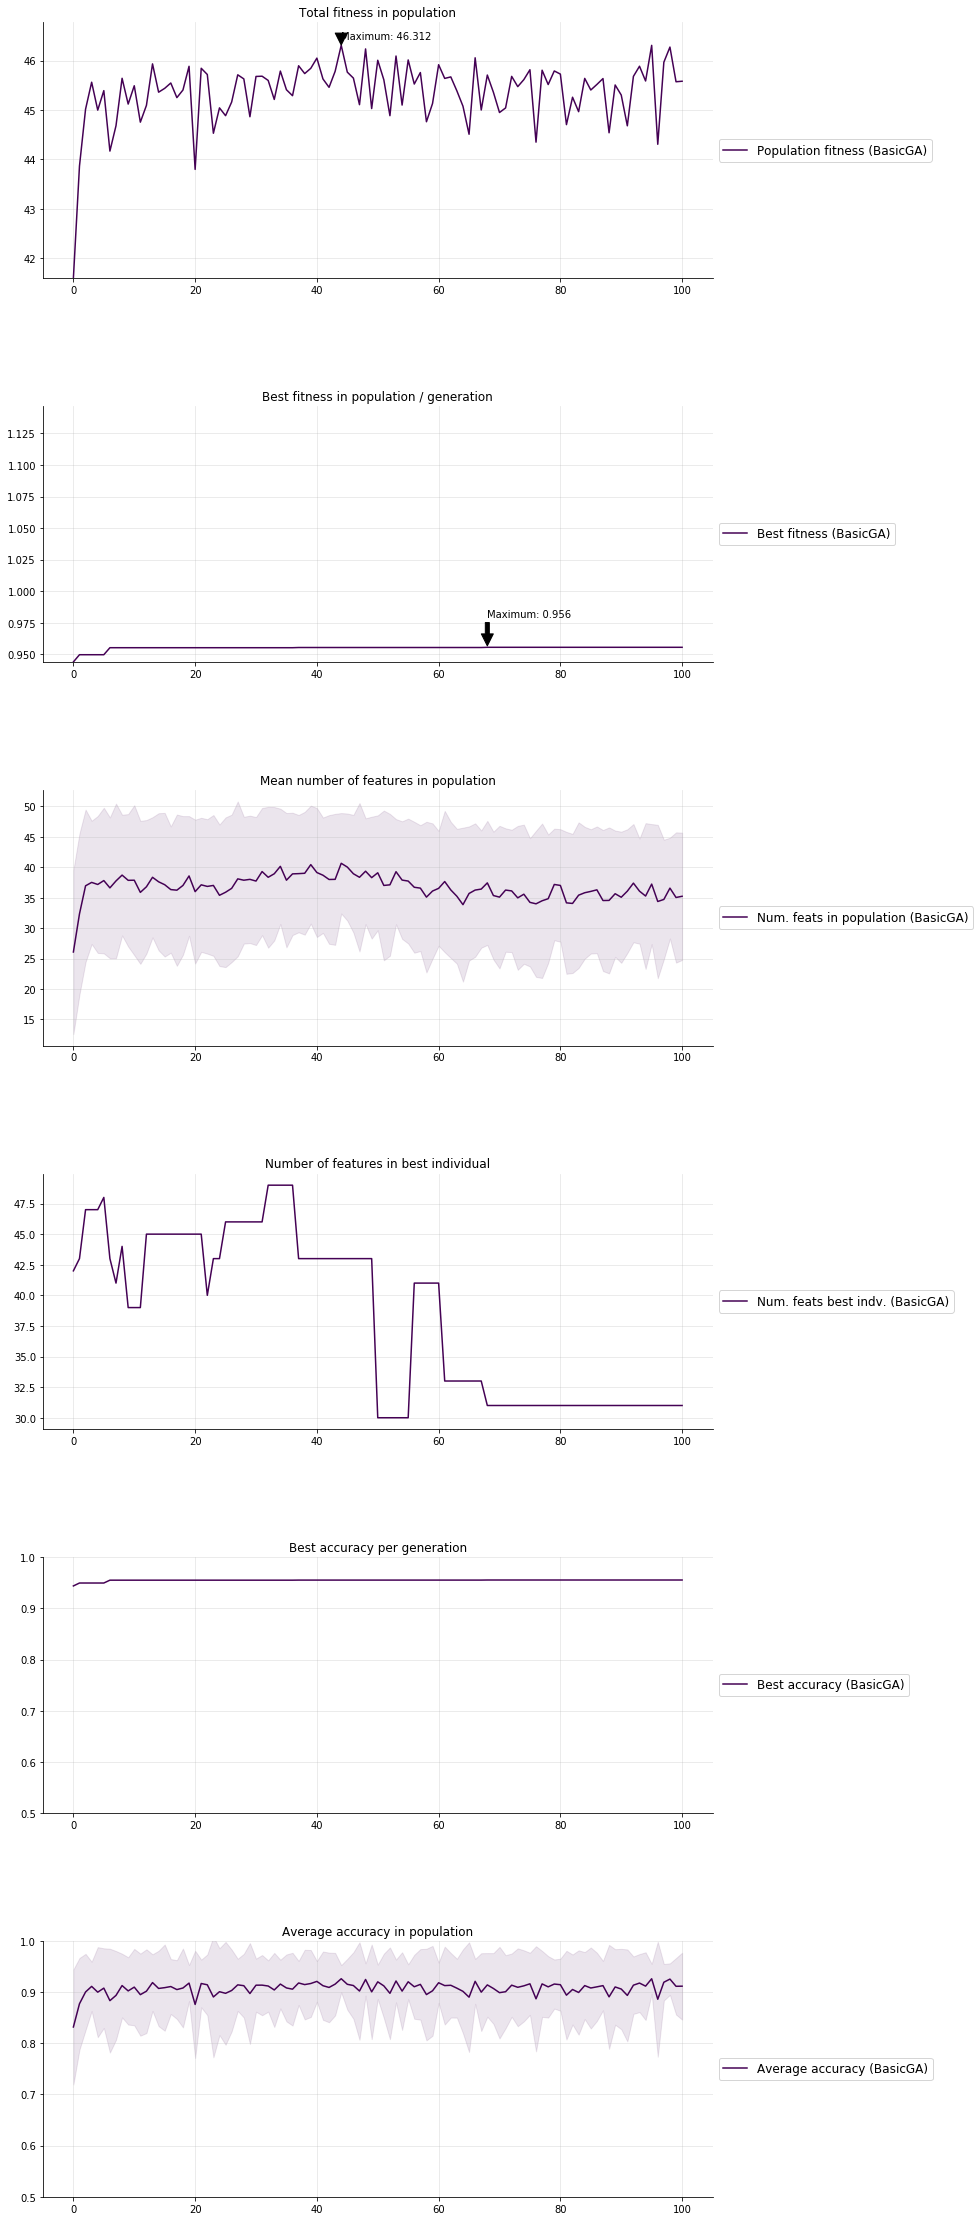

In [16]:
Plotter.plot_evolution(ga_basic)

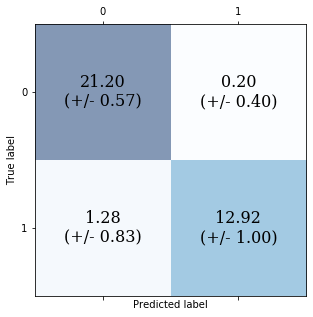

In [17]:
GAevaluator(ga_basic).test_confusion_matrix(cv=5, reps=10)